# Prácicta 11 2024-25 - Árboles de decisión y ensembles 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


## Árboles de decisión

Los árboles de decisión en la librería sklearn en la clase DecisionTreeClassifier y en el módulo "tree" 

El número de parámetros de la clase es bastante amplio y controlan muchos aspectos del comportamiento del modelo. Podemos destacar entre ellos *criterion* que es la medida de impureza utilizada para determinar qué característica se selecciona en cada nodo y puede ser *gini*, *entropy* o *log_loss* dependiendo si se usa el índice de Gini.

In [4]:
df = pd.read_csv('datos/wisconsin_breast_cancer.csv')
X = df.values[:,2:]
y = df.values[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2468)

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [6]:
tree = DecisionTreeClassifier(random_state=1357)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud*100:.2f}%')

Exactitud: 98.25%


In [7]:
tree = DecisionTreeClassifier(criterion='gini',random_state=1357)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud*100:.2f}%')

Exactitud: 98.25%


In [8]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=1357)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud*100:.2f}%')

Exactitud: 93.86%


Ajuste del parámetro criterio utilizando gridsearchCV

**Ejemplo de sobreajuste**: utilizar el conjunto de test para ajustar el hiperparámetro

In [9]:
tree = DecisionTreeClassifier(random_state=1357)

params = {'criterion': ['gini', 'entropy']}
clf = GridSearchCV(tree, params)
clf.fit(X_train, y_train)
print(f'Mejor criterio: {clf.best_params_}')
print(f'Mejores hiperparámetros: {clf.best_params_}')
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud*100:.2f}%')

Mejor criterio: {'criterion': 'entropy'}
Mejores hiperparámetros: {'criterion': 'entropy'}
Exactitud: 93.86%


In [10]:
best_tree = clf.best_estimator_
y_pred = best_tree.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud*100:.2f}%')

Exactitud: 93.86%


### Representación gráfica de los árboles

El módulo tree implementa la función plot_tree que muestra gráficamente la estructura de un árbol de la clase DecisionTreeClassifier. Para hacer que la imagen salga más grande, se puede crear una figura con plt.figure y asignarle el tamaño con el argumento figsize=(ancho, alto)

In [11]:
df.columns.shape[0]

32

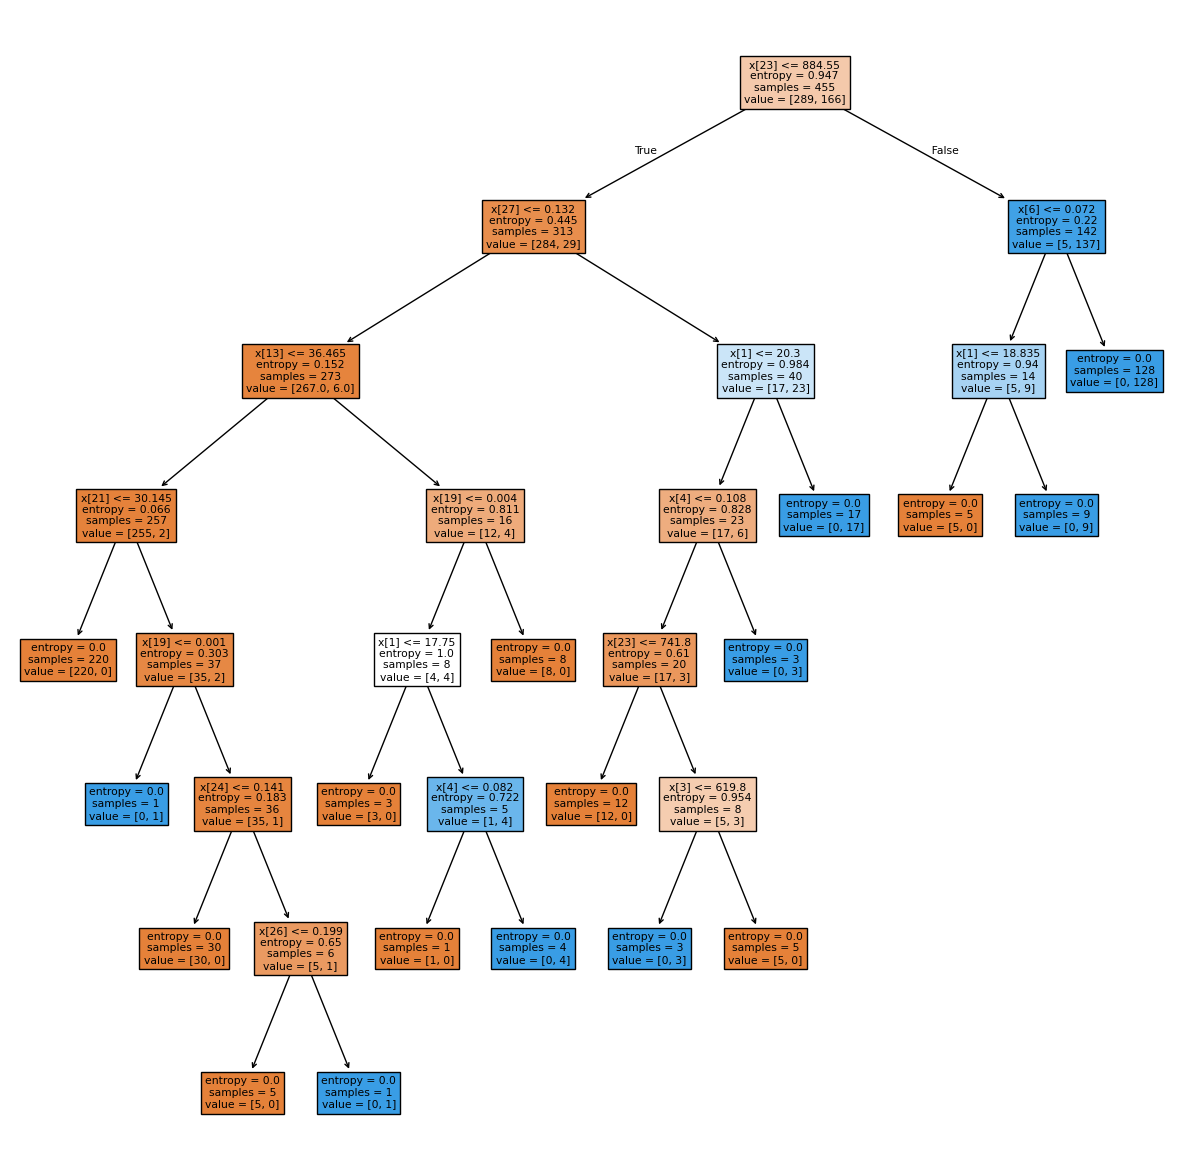

In [12]:
figura = plt.figure(figsize=(15,15))
fig = plot_tree(best_tree,filled=True)
plt.show()

### Parámetros DecisionTreeClassifier

Otro parámetro es *splitter* que indica cómo se selecciona la característica una vez se ha calculado la medida de impureza. Puede tener el valor *best* para seleccionar la característica con mejor valor de la medida, o *random* que selecciona una característica de forma aleatoria pero manteniendo la distribución de probabilidad dada por la medida de impureza (características con mejor valor de la medida de impureza tienen mayor probabilidad de ser elegidas). La profundidad máxima del árbol generado se controla mediante el parámetro *max_depth*. 

Probar con diferentes valores de *max_depth* para comprobar que aún no obteniendo un árbol con nodos hojas puros (solo muestras de una clase), el rendimiento en el conjunto de test puede ser mejor debido a que no está especializado (overfitting) en el conjunto de entrenamiento.

In [13]:
tree = DecisionTreeClassifier(random_state=1357)

params = {'criterion': ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7,8,9,10], 'splitter': ['best', 'random']}
clf = GridSearchCV(tree, params)
clf.fit(X_train, y_train)
print(f'Mejor criterio: {clf.best_params_}')
print(f'Tasa mejor parámetros: {clf.best_score_*100:.2f}%')

Mejor criterio: {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'random'}
Tasa mejor parámetros: 94.73%


/home/miguel/.local/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [14]:
tree = DecisionTreeClassifier(criterion=clf.best_params_['criterion'], max_depth=clf.best_params_['max_depth'], random_state=1357)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud*100:.2f}%')

Exactitud: 93.86%


### Manejo de características no numéricas

La implementación del árbol de decisión en sklearn no admite características no numéricas. En ese caso hay que hacer un preprocesamiento dependiendo si en los valores de la variable se puede establecer una relación de orden, p.e. (alto, medio, bajo) o (frío, templado, caliente); o esa relación no se puede establecer, p.e. (camisa, sueter, camiseta, chaqueta). En el primer caso se puede usar una codificación entera con el 1 para el menor valor, 2 para el siguiente y así sucesivamente. En el segundo caso habría que generar variables auxiliares para implementar una codificación one-hot-encoder. 

Explicar cómo pasar un diccionario con los argumentos a una función o clase en python

    res = función(**diccionario)

**Ejercicio de clase**

Probar a generar el árbol con selección aleatoria con el argumento splitter y cambiando la profundidad máxima. Obtener las medidas de rendimiento y mostrar por pantalla.

#### Solución

In [15]:
tree = DecisionTreeClassifier(random_state=1357)

params = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [1,2,3,4,5,6,7,8,9,10]}
clf = GridSearchCV(tree, params)
clf.fit(X_train, y_train)
print(f'Mejor criterio: {clf.best_params_}')
print(f'Tasa mejor parámetros: {clf.best_score_*100:.2f}%')

tree = DecisionTreeClassifier(**clf.best_params_, random_state=1357) # Esto es un unpacking de diccionario, es otra forma de pasar los parámetros
# tree = DecisionTreeClassifier(criterion=clf.best_params_['criterion'], splitter=clf.best_params_['splitter'], max_depth=clf.best_params_['max_depth'], random_state=1357)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud*100:.2f}%')

Mejor criterio: {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'random'}
Tasa mejor parámetros: 94.73%
Exactitud: 97.37%


## Ensembles

### Stacking

Una primera aproximación a los ensembles es entrenar diferentes modelos base con el mismo conjunto de datos de entrenamiento y luego combinar las predicciones de esos modelos base, con otro modelo que daría la predicción final. Esta estructura de modelos a dos niveles se denomina *Stacking*. En un primer nivel se entrenan los modelos base usando el conjunto de entrenamiento. A continuación, las predicciones de esos modelos base se utilizarán como conjunto de entrenamiento del modelo del nivel superior que será el que proporcione la predicción final. Para obtener la predicción de una nueva muestra, esta muestra se introduce en los modelos base previamente entrenados, y la salida de dichos modelos será la entrada al modelo superior. La predicción de este último modelo será la predicción del ensemble de stacking de la muestra.

En sklearn, el módulo ensembles contiene la clase StackingClassifier que implementa este método. Los argumentos que se deben pasar son los clasificadores base que denominan *estimadors* y el clasificador final. En el primer caso es una lista de tuplas con el primer elemento de la tupla como una cadena de caracteres y el segundo una instancia de un clasificador. El clasificador final es una instancia de un clasificador.

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import StackingClassifier 

from sklearn.metrics import accuracy_score

In [50]:
df = pd.read_csv('datos/wisconsin_breast_cancer.csv')
X = df.values[:,2:]
y = df.values[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2468)

In [51]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
# print(classification_report(y_test, y_pred))
print(f'Exactitud: {accuracy_score(y_test, y_pred)*100:.1f}')

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
# print(classification_report(y_test, y_pred))
print(f'Exactitud: {accuracy_score(y_test, y_pred)*100:.1f}')


svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
# print(classification_report(y_test, y_pred))
print(f'Exactitud: {accuracy_score(y_test, y_pred)*100:.1f}')

Exactitud: 93.9
Exactitud: 94.7
Exactitud: 90.4


In [52]:
nb = GaussianNB()
lr = LogisticRegression(max_iter=10000)
svm = SVC()
tree = DecisionTreeClassifier(random_state=1357)

estimadores = [('nb', nb), ('lr', lr), ('svm', svm), ('tree', tree)]

clf = StackingClassifier(estimators=estimadores, final_estimator=SVC())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))
print(f'Exactitud: {accuracy_score(y_test, y_pred)*100:.1f}')


Exactitud: 97.4


### Bagging. RandomForest

Una posible forma de mejorar el rendimiento de un modelo de aprendizaje automático es disponer de un conjunto de modelos base de forma cada uno proporcione una predicción y luego combinar todas esas predicciones. Una de estas aproximaciones es la empleada en el modelo de Random Forest en la que un conjunto de árboles son entrenados con diferentes muestreos con resustitución *Bagging* del conjunto de entrenamiento.

https://bookdown.org/content/2031/ensambladores-random-forest-parte-i.html

Implementación básica de un random forest como ejemplo de bagging

Primero se debe convertir a numérico las etiquetas para facilitar el proceso

In [56]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('datos/acentos-idiomas.csv')

X = df.values[:,1:]
y = df.values[:,0]

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2468)

Se entrenan n árboles aleatorios con una muestra boostraping del conjunto de entrenamiento y luego se almacena la predicción sobre el conjunto de test para cada árbol.

A continuación se obtiene la clase mayoritaria para cada muestra de conjunto de test

In [71]:
#semilla
np.random.seed(123)
####

n_arboles = 50
prop_bagging = 0.8 # 80% de los datos de entrenamiento

n_train, _ = X_train.shape
n_test, _ = X_test.shape

res = np.empty((n_test, n_arboles), dtype=int) # matriz de resultados
print(res.shape)

for idx in range(n_arboles):
    train_pos = np.random.choice(n_train, size=int(n_train*prop_bagging)) # muestreo aleatorio

    X_train_bag = X_train[train_pos]
    y_train_bag = y_train[train_pos]

    arbol = DecisionTreeClassifier(splitter='random')
    arbol.fit(X_train_bag, y_train_bag)

    y_pred_bag = arbol.predict(X_test)
    res[:,idx] = y_pred_bag

y_pred = []

for idx in range(n_test):
    mas_frecuente = np.bincount(res[idx,:]).argmax() # busca el índice del valor más frecuente (votar)
    y_pred.append(mas_frecuente)

exactitud = accuracy_score(y_test, y_pred)
print(f'{exactitud*100:.1f}')
    

(66, 50)
78.8


La librería sklearn implementa el ensemble bagging mediante la clase BaggingClassifier. Tiene dos argumentos principales que es el estimador que se utiliza (*estimator*) y el número de estimadores, *n_estimators*

In [58]:
from sklearn.ensemble import BaggingClassifier

In [59]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(splitter="random"), n_estimators=50) # Random Forest

bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
print(f'Tasa acierto: {accuracy_score(y_test, y_pred)*100:.1f}')

Tasa acierto: 78.8


Un caso particular de bagging es el RandomForest que suele dar muy buenos resultados en cuanto a tasa de acierto. Está implementado en la clase *RandomForestClassifier* y tiene como argumento principal el número de estimadores, *n_estimators*.

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
# print(classification_report(y_test, y_pred))
print(f'Exactitud: {accuracy_score(y_test, y_pred)*100:.1f}')

Exactitud: 78.8


In [62]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(f'Exactitud: {accuracy_score(y_test, y_pred)*100:.1f}')

Exactitud: 54.5


Comparar resultados usando GridSearchCV y RandomizedSearchCV.

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
rf = RandomForestClassifier(n_jobs=4)

params = {'criterion': ['gini', 'entropy', 'log_loss'], 'n_estimators': [50,250,300]}
clf = GridSearchCV(rf, params)
clf.fit(X_train, y_train)
print(f'Mejor criterio: {clf.best_params_}')
print(f'Tasa mejor parámetros: {clf.best_score_*100:.2f}%')

rf = RandomForestClassifier(**clf.best_params_)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud*100:.2f}%')

Mejor criterio: {'criterion': 'entropy', 'n_estimators': 300}
Tasa mejor parámetros: 79.85%
Exactitud: 75.76%


In [70]:
rf = RandomForestClassifier(n_jobs=4)

params = {
    'criterion': ['gini', 'entropy', 'log_loss'], 
    'n_estimators': [50,100,150,200,250,300,500],
}
clf = RandomizedSearchCV(rf, params, n_iter=25)
clf.fit(X_train, y_train)
print(f'Mejor criterio: {clf.best_params_}')
print(f'Tasa mejor parámetros: {clf.best_score_*100:.2f}%')

rf = RandomForestClassifier(**clf.best_params_)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud*100:.2f}%')

/home/miguel/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 21 is smaller than n_iter=25. Running 21 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor criterio: {'n_estimators': 200, 'criterion': 'entropy'}
Tasa mejor parámetros: 80.22%
Exactitud: 75.76%
